# 4.1: Real Data Mapping w/ Chayan's Data
We have achieved a low level form of particle tracking. Now the goal is to map the data and retrieve interesting trends.

In [9]:
# Needed to make animations real.
%matplotlib inline
#%matplotlib nbagg|
#%matplotlib widget

In [10]:
# General imports for math
import numpy.random as rnd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
# Imports to make animation work
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.path as path
from IPython.display import HTML

# Access graphing parameters
import matplotlib.mlab as mlb
from matplotlib import rc
import seaborn as sns

In [12]:
# Advanced Math
from scipy import optimize as opt
from scipy.interpolate import interp1d
from scipy import stats as stats
from sklearn.preprocessing import normalize
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage import io
from skimage import exposure
from skimage import data, io, segmentation, color
from skimage.future import graph
from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity

In [13]:
# General Diagnostics and other handy items
import math
import time
import os
import timeit
from timeit import default_timer as timer

# Trouble Shooting
#from pympler.classtracker import ClassTracker
#from pympler import tracker

In [14]:
# Graphing parameters for inline images.
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 4
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['xtick.minor.width'] = 2
#Graphing parameters that I can alter (Need to make this a full method at some point)
font = {
        'weight': 'bold',
        'size': 12,
        'family': 'serif',
        'serif': 'Times New Roman'}
rc('font', **font)
rc('xtick', labelsize = 30)
rc('ytick', labelsize = 30)
rc('lines', linewidth = 4)
rc('axes', linewidth = 4.5)
rc('text', usetex = 'False')
rc('animation', html = 'html5')
# Handy link about changing rc parameters https://matplotlib.org/users/customizing.html
bounding_box = [-1, -0.5, 2, 0.9] # Sets the bounds for the plots below

# Block of code to generate a unique spot to save everyting automatically
date = time.strftime("%Y_%m_%d") # Date string for dynamic saving.
vers = 'Real_Data_Mapping' # A string to denote a differen version for dynamic saving.
nb = 'nb4' # Number of the notebook for dynamic saving.
directory = './saved_outputs/'+date +'/'+nb+'/'+vers+'/'
if not os.path.exists(directory):
    os.makedirs(directory)
print directory
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

./saved_outputs/2019_05_06/nb4/Real_Data_Mapping/
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# Boolean for saving results
save = False
pix2nm = 193.8 # Number of nanometers per pixel in these images
data_dir = './saved_outputs/2019_05_02/nb4/Real_Data_Mapping/1_8_MMStack_Pos0_cropped.tif'

In [165]:
# Declare troika experiment w/ specified sample
from troika_functions import *
print 'Running'
t_e = troikaExperiment(data_dir, verbose = False, is_linking = True, track_time = True, frame_tolerance = 3)
start_time = timeit.default_timer()
for i in range(1000):
    t_e.identifyParticles()
    t_e.nextFrame()
print (timeit.default_timer() - start_time)/60, 'minutes'

Running
mapParticles: Frame  1  of  1000 mapped in  11.1302127838  seconds. 161  of  183  particles mapped.
mapParticles: Frame  2  of  1000 mapped in  13.2662339211  seconds. 187  of  206  particles mapped.
mapParticles: Frame  3  of  1000 mapped in  16.5551688671  seconds. 199  of  227  particles mapped.
mapParticles: Frame  4  of  1000 mapped in  14.7555351257  seconds. 172  of  184  particles mapped.
mapParticles: Frame  5  of  1000 mapped in  13.9311110973  seconds. 169  of  177  particles mapped.
mapParticles: Frame  6  of  1000 mapped in  13.4289140701  seconds. 183  of  196  particles mapped.
mapParticles: Frame  7  of  1000 mapped in  13.5992071629  seconds. 180  of  198  particles mapped.
mapParticles: Frame  8  of  1000 mapped in  15.1873760223  seconds. 195  of  213  particles mapped.
mapParticles: Frame  9  of  1000 mapped in  18.8914179802  seconds. 217  of  247  particles mapped.
mapParticles: Frame  10  of  1000 mapped in  14.5181519985  seconds. 181  of  190  particles

KeyboardInterrupt: 

In [166]:
len(t_e.getRealParticles())

9338

9338
5672


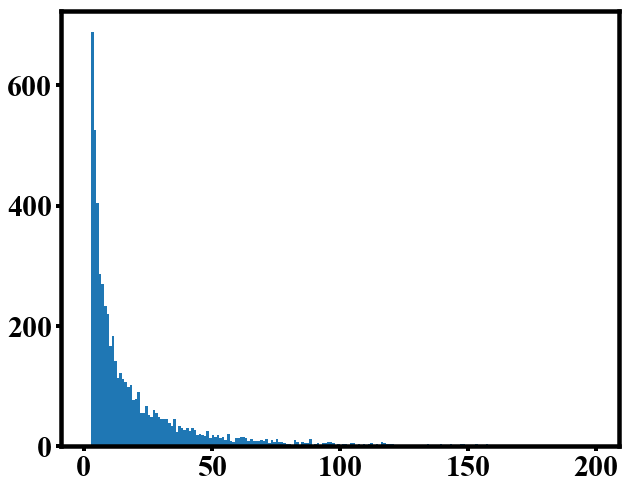

In [175]:
frame_counts = list()
print len(t_e.getRealParticles())
for i in t_e.getRealParticles():
    if type(t_e.particles[i]) is tuple:
        continue
    else:
        index = len(t_e.particles[i].frames)
        if index < 3:
            continue
    frame_counts.append(index)
bins = np.arange(1, 200, 1)
plt.hist(frame_counts, bins)
print len(frame_counts)
#plt.savefig(directory+'frameCounts_700frames_10frameCutoff.png',transparent = True)

In [131]:
part = t_e.getParticle((0,9))

In [132]:
np.sqrt(part.calcMSD())

7.377968977266589

In [133]:
part.raw_x_pos

array([455., 459., 458., 458., 461., 462., 464., 461., 461., 461., 461.,
       462., 461., 462., 461., 460., 459., 458., 457., 457., 456., 457.,
       457., 457., 455., 457., 457., 456., 456., 456., 456., 455., 457.,
       457., 455., 456., 457., 458., 458., 458., 458., 457., 459., 460.,
       459., 458., 457., 457., 458., 457., 459., 462., 461., 459., 457.,
       458., 458., 454., 453., 452., 456., 457., 457., 456., 456., 457.,
       457., 457., 458., 459., 459., 464., 463., 463., 464., 465., 465.,
       464., 466., 467., 467., 466., 464., 466., 465., 466., 465., 464.,
       465., 463., 465., 463., 462., 462., 464., 462., 463., 465., 463.,
       463., 465., 463., 463., 463., 464., 464., 462., 461., 461., 463.,
       463., 464., 462., 463., 462., 463., 461., 462., 462., 461., 459.,
       461.])

In [134]:
part.raw_y_pos

array([292., 293., 294., 290., 289., 288., 287., 286., 288., 287., 287.,
       288., 288., 289., 290., 289., 291., 290., 290., 292., 288., 291.,
       291., 290., 288., 287., 285., 285., 285., 284., 284., 285., 286.,
       288., 290., 292., 292., 292., 291., 292., 291., 291., 293., 293.,
       291., 291., 291., 290., 292., 290., 291., 290., 292., 294., 290.,
       289., 288., 291., 289., 286., 284., 285., 285., 285., 285., 286.,
       284., 285., 286., 287., 287., 284., 281., 280., 283., 285., 293.,
       292., 293., 290., 291., 296., 294., 294., 292., 291., 290., 291.,
       292., 290., 289., 289., 289., 290., 291., 291., 291., 292., 291.,
       290., 290., 291., 290., 291., 291., 291., 291., 289., 291., 290.,
       291., 291., 290., 291., 291., 290., 288., 290., 288., 292., 293.,
       297.])

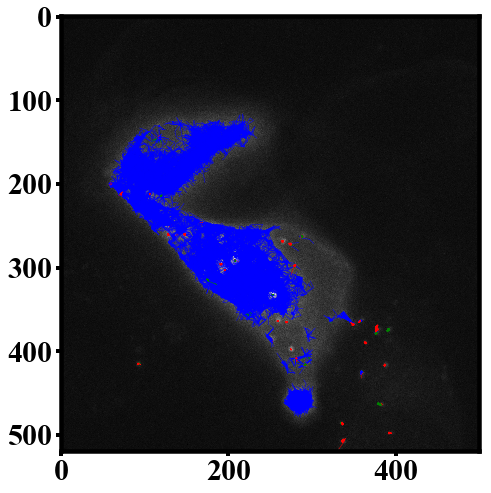

In [176]:
plt.figure(figsize = (8,8))
for i in t_e.getRealParticles():
    part = t_e.getParticle(i)
    x = part.raw_x_pos
    if len(x) < 10:
        continue
    y = part.raw_y_pos
    color = 'black'
    if part.calcMSD() < 2:
        color = 'red'
    elif part.calcMSD() < 5:
        color = 'green'
    else:
        color = 'blue'
    plt.plot(y, x, color = color, linewidth = 0.5)
plt.imshow(t_e.getFrame(0))

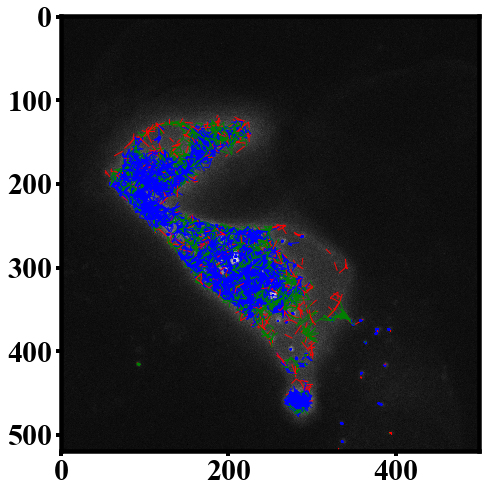

In [136]:
plt.figure(figsize = (8,8))
for i in t_e.getRealParticles():
    part = t_e.getParticle(i)
    x = part.raw_x_pos
    y = part.raw_y_pos
    color = 'black'
    if len(x) < 5:
        color = 'red'
    elif len(x) < 18:
        color = 'green'
    else:
        color = 'blue'
    plt.plot(y, x, color = color, linewidth = 1)
plt.imshow(t_e.getFrame(0))

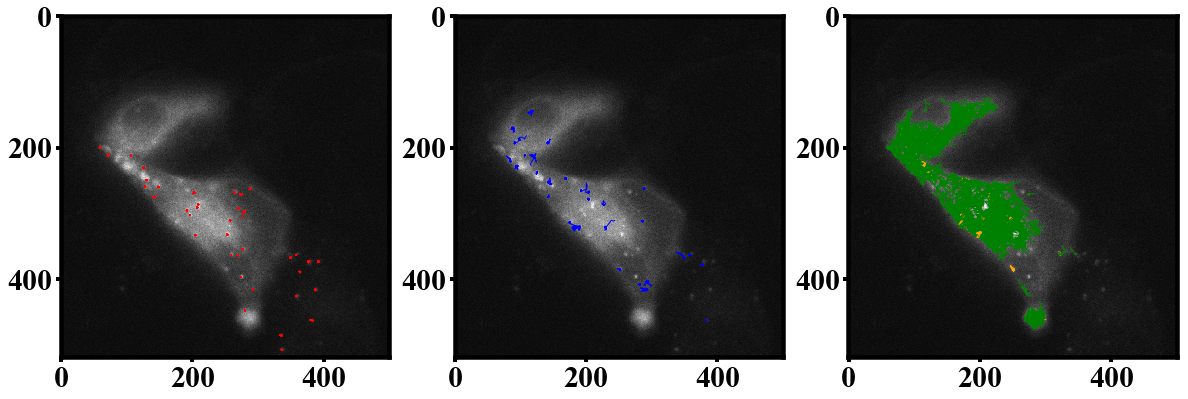

In [137]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(20,20))
ax1.imshow(t_e.getFrame(0))
ax2.imshow(t_e.getFrame(0))
ax3.imshow(t_e.getFrame(0))

for i in t_e.getRealParticles():
    part = t_e.getParticle(i)
    x = part.raw_x_pos
    y = part.raw_y_pos
    if len(x) < 18:
        continue
    color = 'black'
    if part.calcMSD() < 2:
        ax1.plot(y, x, color = 'red', linewidth = 1)
    elif part.calcMSD() < 10:
        ax2.plot(y, x, color = 'blue', linewidth = 1)
    elif part.calcMSD()< 20:
        ax3.plot(y, x, color = 'orange', linewidth = 1)
    else:
        ax3.plot(y, x, color = 'green', linewidth = 1)
plt.savefig(directory+'mapping_MSD_trajectories.png', transparent = True)

In [188]:
# Get distributions
num_parts = len(t_e.getRealParticles())
rmsd = np.zeros(num_parts)
dist = np.zeros(num_parts)
t_e_index = list()
labels = list()
index = 0
brownian_radius = 4
frame_cutoff = 75
for i in t_e.getRealParticles():
    part = t_e.getParticle(i)
    if len(part.raw_x_pos) > frame_cutoff:
        rmsd[index] = np.sqrt(part.calcMSD())
        dist[index] = np.sqrt((part.raw_x_pos[0]-part.raw_x_pos[-1])**2 + (part.raw_y_pos[0] - part.raw_y_pos[-1])**2)
        diff_factor = dist[index] - rmsd[index]
        if diff_factor < -brownian_radius:
            labels.append('Super-diffusive')
        elif diff_factor > brownian_radius:
            labels.append('Sub-diffusive')
        else:
            labels.append('Brownian')
        t_e_index.append(i)
        index += 1

rmsd = np.trim_zeros(rmsd)
dist = np.trim_zeros(dist)

/home/ldcbishop/anaconda2/lib/python2.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


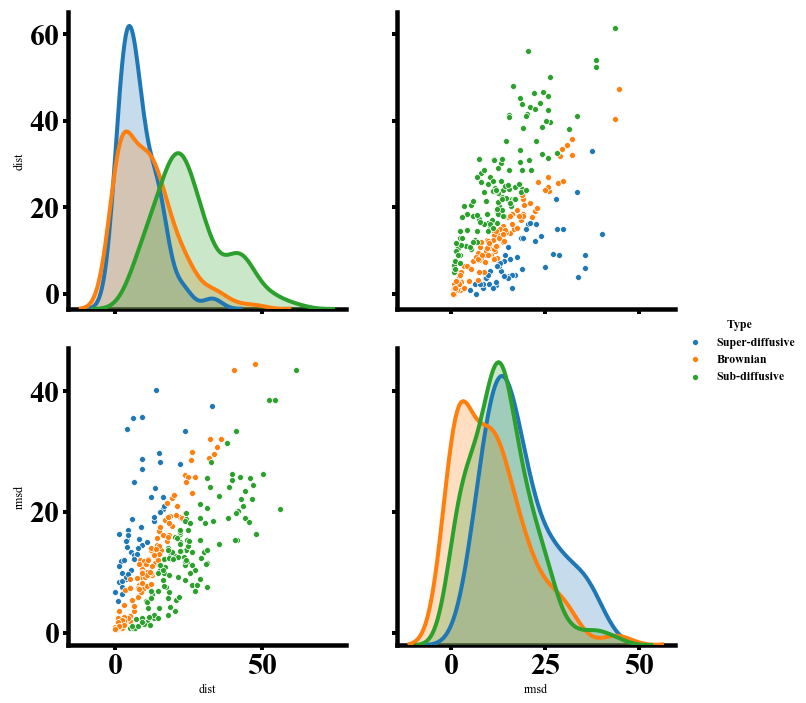

In [189]:
data = pd.DataFrame({'Type':labels,'rmsd': rmsd, 'dist': dist})
sns.pairplot(data, hue = 'Type', size = 5)
plt.savefig(directory+'700frames_len_75_brownian_trajectories_correlation_graphs.png', transparent = True)

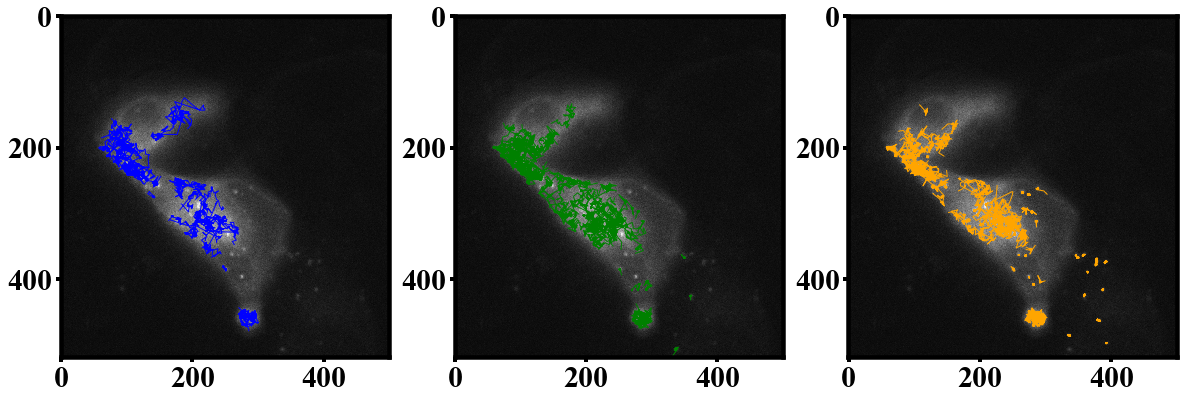

In [190]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(20,20))
ax1.imshow(t_e.getFrame(0))
ax2.imshow(t_e.getFrame(0))
ax3.imshow(t_e.getFrame(0))

cutoff = 40
for i in t_e.getRealParticles():
    part = t_e.getParticle(i)
    if len(part.raw_x_pos) <= frame_cutoff:
        continue
    label_index = t_e_index.index(i)
    x = part.raw_x_pos
    y = part.raw_y_pos
    color = 'black'
    
    if labels[label_index] == 'Super-diffusive':
        ax1.plot(y, x, color = 'blue', linewidth = 1)
        #ax1.plot(y[0], x[0], 'og')
        #ax1.plot(y[-1], x[-1], 'ob')
    elif labels[label_index] == 'Sub-diffusive':
        ax2.plot(y, x, color = 'green', linewidth = 1)
        #ax2.plot(y[0], x[0], 'og')
        #ax2.plot(y[-1], x[-1], 'ob')
    else:
        ax3.plot(y, x, color = 'orange', linewidth = 1)
        #ax3.plot(y[0], x[0], 'og')
        #ax3.plot(y[-1], x[-1], 'ob')
plt.savefig(directory+'700frame_len_75_brownian_trajectories.png', transparent = True)

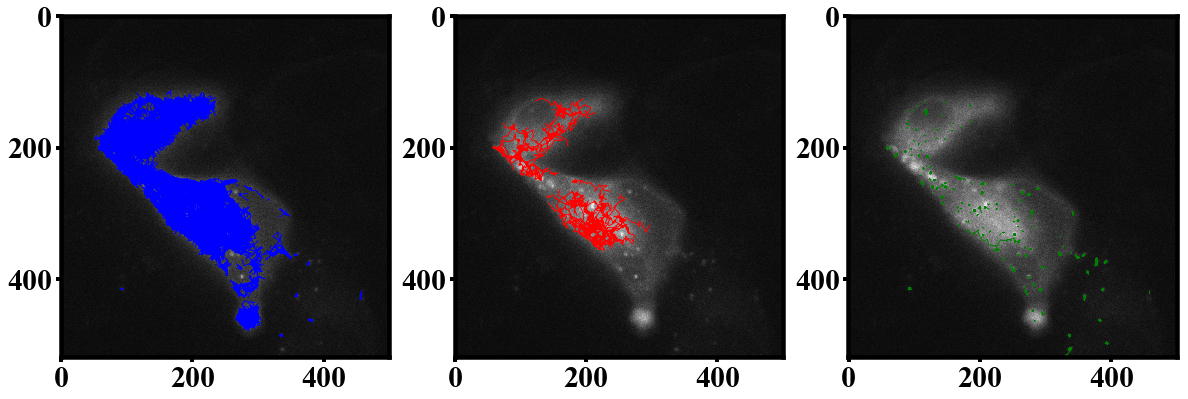

In [192]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(20,20))
ax1.imshow(t_e.getFrame(0))
ax2.imshow(t_e.getFrame(0))
ax3.imshow(t_e.getFrame(0))

cutoff = 50

for i in t_e.getRealParticles():
    part = t_e.getParticle(i)
    x = part.raw_x_pos
    y = part.raw_y_pos
    frame_len = len(x)
    color = 'black'
    dist = np.sqrt((x[0]-x[-1])**2 + (y[0]-y[-1])**2)
    if frame_len < 3:
        continue
    elif dist < cutoff - 5 and part.calcMSD() > 3:
        ax1.plot(y, x, color = 'blue', linewidth = 1)
        #ax1.plot(y[-1], x[-1], 'ob')
    elif dist < cutoff + 20 and part.calcMSD() > 5:
        ax2.plot(y, x, color = 'red', linewidth = 1)
        #ax2.plot(y[0], x[0], 'og')
        #ax2.plot(y[-1], x[-1], 'ob')
    else:
        ax3.plot(y, x, color = 'green', linewidth = 1)
        #ax3.plot(y[0], x[0], 'og')
        #ax3.plot(y[-1], x[-1], 'ob')
plt.savefig(directory+'700frame_mapping_MSD_trajectories.png', transparent = True)

In [211]:
import imageio

def getParticlesFromFrame(frame_num):
    # Need to change t_e to self later
    particles = t_e.getRealParticles()
    parts_in_frame = list()
    for i in particles:
        part = t_e.getParticle(i)
        if frame_num in part.frames:
            parts_in_frame.append(i)
    return parts_in_frame
            
def plotTraceFrame(frame_num):
    #image = t_e.plotCurrImage(add_particles=False, is_GIF=True)
    part_keys = getParticlesFromFrame(frame_num)
    fig, ax = plt.subplots(figsize = (6,6), dpi = 300)
    # An explantion on how to eliminate excess whitespace can be found here https://stackoverflow.com/questions/49693560/removing-the-white-border-around-an-image-when-using-matplotlib-without-saving-t
    fig.subplots_adjust(0,0,1,1)
    ax.imshow(t_e.getFrame(frame_num))
    t_e.plotScaleBar()
    for i in part_keys:
        xs, ys = t_e.getParticle(i).getParticleTrace(frame_num)
        plt.plot(ys, xs, linewidth = 0.5)
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return image

def particleTrackingGIF(frame_start, frame_end):
    t_e.curr_frame_num = frame_start
    is_next_frame = True
    gif_data = list()
    while is_next_frame and t_e.curr_frame_num < frame_end:
        print t_e.curr_frame_num
        gif_data.append(plotTraceFrame(t_e.curr_frame_num))
        plt.close()
        is_next_frame = t_e.nextFrame()
    imageio.mimsave(directory+'mapping_gif.gif', gif_data, fps = 1)

In [212]:
particleTrackingGIF(1, 20)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [213]:
t_e.makeFancyGIF(directory+'cropped_gif.gif')

50 frames of 1000 completed!
100 frames of 1000 completed!
150 frames of 1000 completed!
200 frames of 1000 completed!
250 frames of 1000 completed!
300 frames of 1000 completed!
350 frames of 1000 completed!
400 frames of 1000 completed!
450 frames of 1000 completed!
500 frames of 1000 completed!
550 frames of 1000 completed!
600 frames of 1000 completed!
650 frames of 1000 completed!
700 frames of 1000 completed!
750 frames of 1000 completed!
800 frames of 1000 completed!
850 frames of 1000 completed!
900 frames of 1000 completed!
950 frames of 1000 completed!
nextFrame: There are no more frames to pass forward!
1000 frames of 1000 completed!
Finished processing. Saved at:  ./saved_outputs/2019_05_06/nb4/Real_Data_Mapping/cropped_gif.gif
